In [2]:
import sys
import os

# Add the scripts/ folder to the Python path
sys.path.append(os.path.abspath("scripts"))

In [3]:
import joblib
from scripts.split_data import load_split_data
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    accuracy_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.save_utils import save_fig

In [4]:
model_path = "models/lightgbm_pipeline_20250408_195409.joblib"
lightgbm_model = joblib.load(model_path)

In [5]:
DATA_PATH = "data/raw/Bank Customer Churn Prediction.csv"
_, X_test, _, y_test = load_split_data(DATA_PATH)

In [6]:
#Predict class labels
y_pred = lightgbm_model.predict(X_test)

#Predict probabilities for ROC/PR curves
y_prob = lightgbm_model.predict_proba(X_test)[:, 1]

#### Classification Report

In [7]:
report = classification_report(y_test, y_pred, target_names=["Not Churned", "Churned"])
print(report)

              precision    recall  f1-score   support

 Not Churned       0.88      0.97      0.92      1593
     Churned       0.78      0.47      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



#### Confusion Matrix

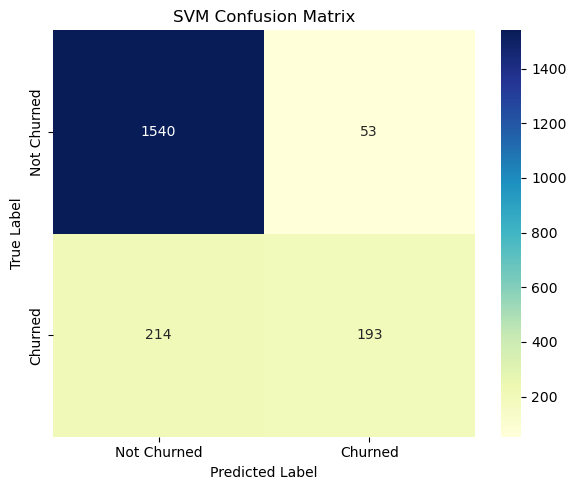

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Not Churned", "Churned"],
            yticklabels=["Not Churned", "Churned"])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
save_fig("eval-lightgbm-confusion-matrix", "evaluation")
plt.show()

#### ROC - AUC 

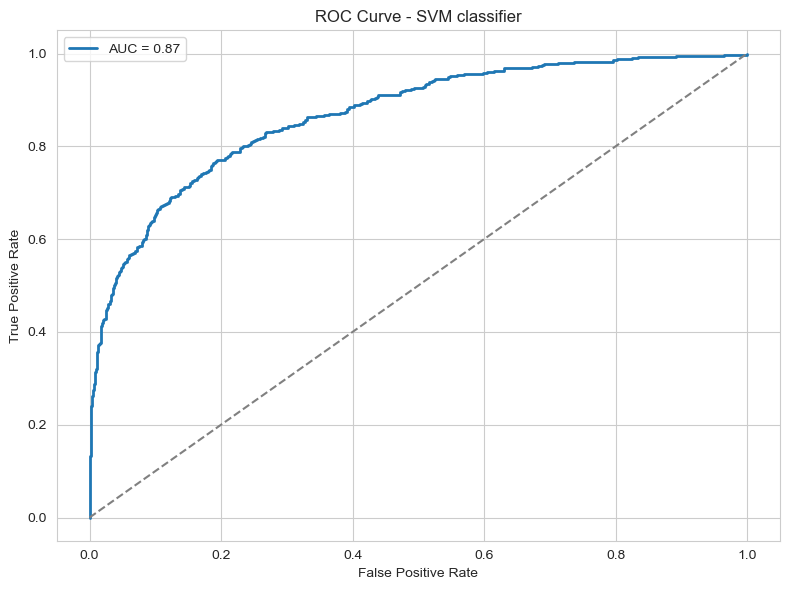

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="#1f77b4", linewidth=2)
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM classifier")
plt.legend()
plt.tight_layout()
save_fig("eval-lightgbm-roc-auc", "evaluation")
plt.show()

#### Precision - Recall Curve

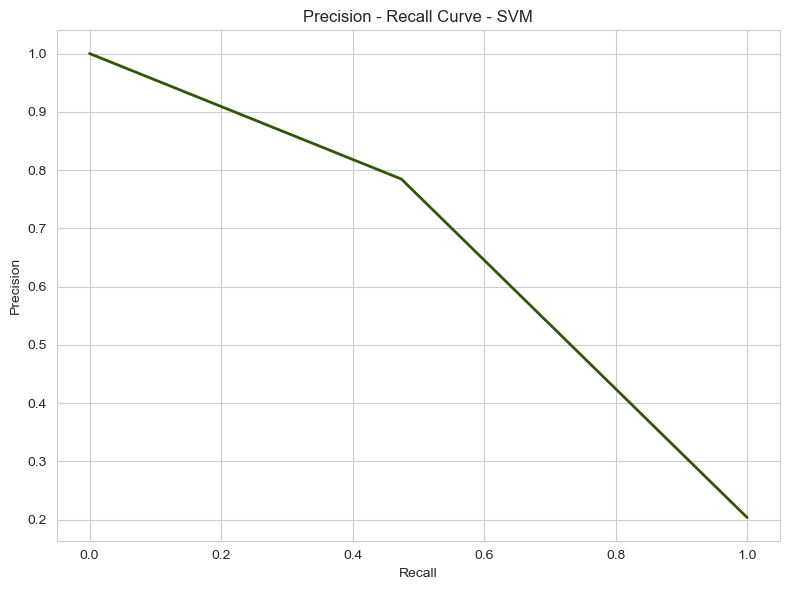

In [16]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="#35530a", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision - Recall Curve - SVM")
plt.grid(True)
plt.tight_layout()
# save_fig("eval-svm-precision-recall-curve", "evaluation")
plt.show()

##  LightGBM Model Evaluation Summary

###  Overall Performance

- **Accuracy**: **0.87**
- **F1 Score (Churned class)**: **0.59**
- **ROC AUC Score**: **0.87**


- **Recall for Churned customers (0.47)** is **better than SVM** but slightly lower than **Random Forest** and **XGBoost**.
- **Precision for Churned class (0.78)** is **very good**, suggesting fewer false positives.
- **F1-score for Churned** (our minority class) is **strong**, balancing precision and recall.

---

### Confusion Matrix Highlights

- **True Negatives (TN)**: 1540
- **False Positives (FP)**: 53
- **False Negatives (FN)**: 214
- **True Positives (TP)**: 193

LightGBM does **very well at identifying non-churned customers**, with very few false positives. It still misses about **half of the churned** customers, but this is a common trend in class-imbalanced problems.

---

### ROC Curve (AUC = **0.87**)

- The ROC curve rises sharply and hugs the top-left corner, which reflects **strong discriminatory power**.
- The AUC of 0.87 is tied with **SVM**, and slightly better than **Random Forest** and **XGBoost**.

---

### Precision-Recall Trade-off

- The precision-recall curve shows a good trade-off, with **high precision even as recall increases**, until a sharp drop at higher recall levels.
- This curve confirms that LightGBM maintains **reliability in its positive predictions**, which is **vital** for churn detection.

